<img align="left" src="img/logo-ucm.png" width="25%">
<br/><br/><br/><br/><br/>


# [Doctorado en Ingeniería (DocIng)](http://www.docing.ucm.cl/index.html)

# [Doctorado en Modelamiento Matemático Aplicado (DM<sub>2</sub>A)](http://vrip.ucm.cl/doctorado-en-modelamiento-matematico-aplicado/)


## Computación Científica I: Introducción a Python para la Investigación. 
### Sesión Practica 2

&nbsp;
### Profesor: Dr. Ruber Hernández García

<div style="overflow: hidden; display: inline-block;">
    <div style="display: inline-block; max-width: 20%; max-height: 20%;">
        <a href="mailto:rhernandez@ucm.cl">
            <img src="img/email.webp" alt="email" height="24px" width="24px">
        </a>
    </div>
    <div style="display: inline-block; max-width: 20%; max-height: 20%;">
        <a href="www.ruberhg.com">
            <img src="img/website-icon.jpeg" alt="website" height="24px" width="24px">
        </a>
    </div>
    <div style="display: inline-block; max-width: 20%; max-height: 20%;">
        <a href="https://orcid.org/0000-0002-9311-1193">
            <img src="img/orcid.png" alt="orcid" height="24px" width="24px">
        </a> 
    </div>
    <div style="display: inline-block; max-width: 20%; max-height: 20%;">
        <a href="https://github.com/ruberhg" rel="nofollow noreferrer">
            <img src="img/github.png" alt="github" height="24px" width="24px">
        </a>
    </div>
</div>



## Entrada de datos en Python: función `input`

La entrada de datos en Python es bastante simple por medio de la función `input()`. Usando esta función se puede leer datos por teclado y asignar ese valor recibido a una variable.

In [4]:
!cat scripts/mi_primer_script.py

import math
     
print("Hola gente del curso de Computación Científica")
print("¿Cuántos somos hoy en clase?")

number = input()
number = int(number)
root = math.sqrt(number)

print("Ufff! eso es un montón! espero que aprendan mucho")
print("Por cierto, la raiz de %i es %f" %(number, root))


In [5]:
%run scripts/mi_primer_script.py

Hola gente del curso de Computación Científica
¿Cuántos somos hoy en clase?
4
Ufff! eso es un montón! espero que aprendan mucho
Por cierto, la raiz de 4 es 2.000000


## Entrada de datos en Python: Calculadora Simple

Supongamos que tenemos el siguiente código, donde tenemos dos números `a` y `b` que se suman, restan o multiplican en función del valor de la variable `operacion`.


In [6]:
!cat scripts/calculadora.py

# calculadora.py

# Tipo de operacion: suma/resta/multiplicación
operacion = "suma"

# Parámetros de la operación
a = 4
b = 7

if operacion == "suma":
    print(a+b)
elif operacion == "resta":
    print(a-b)
elif operacion == "multiplicacion":
    print(a*b)

In [5]:
# Tipo de operacion: suma/resta/multiplicación
operacion = input("¿Qué tipo de operación desea realizar: suma/resta/multiplicacion...")

# Parámetros de la operación
a = int(input("Introduzca el valor de a:"))
b = int(input("Introduzca el valor de b:"))

if operacion.lower() == "suma":
    print(a+b)
elif operacion == "resta":
    print(a-b)
elif operacion == "multiplicacion":
    print(a*b)

¿Qué tipo de operación desea realizar: suma/resta/multiplicacion...Suma
Introduzca el valor de a:32
Introduzca el valor de b:23
55


<div class="alert alert-warning"><strong>Importante:</strong> La función <code>input()</code> siempre retorna el dato como un string, incluso aunque sea un número válido, así que se debe convertir a número (float o int) según lo requiera para el programa.
</div>

## Entrada de datos en Python: Línea de Comandos

Los _Command Line Interface_ o interfaces de línea de comandos (comúnmente abreviado como CLI) son una herramienta que ofrecen gran cantidad de programas para interactuar con ellos. Si alguna vez has usado el comando `ls` o `mkdir` de Linux, ya has usado un CLI.

Los CLI son una herramienta perfecta para exponer tu código a que pueda ser usado por otras personas, de manera sencilla y encapsulando el contenido que está en el interior. De ahí su nombre de interfaz, que no es gráfico, sino de línea de comandos. Permite establecer ciertos parámetros ya sea para introducir datos al programa o para que se comporte en dependencia de ciertas condiciones.

## Entrada de datos en Python: Línea de Comandos

En el ejemplo anterior (`calculadora.py`), necesitamos abstraer al usuario del código, y darle la posibilidad que pueda simplemente decir el valor de `a`, `b` y `operacion`, y obtener el resultado.

Por tanto, debemos buscar una manera en la que un usuario pueda pasar por terminal los parámetros necesarios para que sean usados por el código. Por ejemplo:

    python calculadora.py 5 2 suma
    
    python calculadora.py --a=5 --b=2 --operacion=suma

## Creando un CLI: módulo `sys` 

La primera forma que tenemos de que un script reciba argumentos desde el terminal es usando el módulo `sys`.

In [ ]:
# calculadora.py

import sys

print(sys.argv)

De esta manera se captura todo lo que se pasa después de `python`. El primer elemento `argv[0]` devuelve el nombre del script. A continuación se capturan todos y cada uno de los argumentos que se pasan a la derecha del mismo.

    python calculadora.py 5 2 suma
    ['calculadora.py', '5', '2', 'suma']

## Creando un CLI: módulo `argparse` 

La librería [`argparse`](https://docs.python.org/es/3.9/library/argparse.html#) permite crear un CLI para todo tipo de proyectos, ofreciendo un amplio abanico de posibilidades útiles hasta en los proyectos más complejos.

Para su uso se debe seguir los siguientes pasos:
* Importamos la librería.
* Creamos un `ArgumentParser`.
* Añadimos argumentos.
* Parseamos los argumentos.

In [ ]:
# calculadora.py

import argparse
parser = argparse.ArgumentParser()
parser.add_argument("a")
parser.add_argument("b")
parser.add_argument("operacion")

args = parser.parse_args()
variables = vars(args)
print(variables)

## Creando un CLI: algunas consideraciones

Con esta primera aproximación ya tendríamos todas las variables que necesitamos en el diccionario variables, pero aunque pueda parecer que ya hemos resuelto nuestro problema, tenemos los siguientes inconvenientes:
* Estamos usando parámetros posicionales, lo que significa que estamos obligados a pasar primero `a`, después `b` y por último òperacion`. Si pasamos los argumentos en otro orden, romperemos el programa.
* No especificamos los tipos de las variables, por defecto todas son string cuando en realidad `a` y `b` deberían ser números enteros.
* El parámetro operacion debería tomar sólo valores discretos, ya que únicamente queremos `suma/resta/multiplicacion`. Deberíamos forzar un error si se pasa una operación no soportada.
* Por defecto, todos los parámetros son obligatorios, pero esto puede no ser siempre el caso. Imagina que por defecto queremos sumar, en el caso de que no se especifique la operación.
* Por último, no estamos ofreciendo ninguna documentación, por lo que la persona que tenga nuestro software no sabrá como usarlo.

## Creando un CLI: algunas consideraciones

Podemos realizar las siguientes modificaciones en el código para hacerlo más correcto. Veamos los cambios:
* El uso de `-a` y `--numero_a` permite indicar el nombre del parámetro que estamos pasando, por lo que ya no será necesario hacerlo en un orden fijo. Se utiliza un guión para la abreviación del argumento y dos para el nombre completo.
* Añadimos `type` a cada argumento.
* Añadimos `choices` a la operación, para que de un error si seleccionamos una no soportada.
* Ponemos la operación como parámetro opcional `required=False` y asignamos un valor por defecto `default` en el caso de que no se proporcione.
* Añadimos documentación con `description` y `help` para que un usuario ajeno a nuestro código sepa utilizarlo.

In [ ]:
# calculadora.py

import argparse

parser = argparse.ArgumentParser(description='Calculadora, suma/resta/multiplica a y b')
parser.add_argument('-a', '--numero_a', type=int, help='Parámetro a')
parser.add_argument('-b', '--numero_b', type=int, help='Parámetro b')
parser.add_argument('-o', '--operacion',
                    type=str,
                    choices=['suma', 'resta', 'multiplicacion'],
                    default='suma', required=False,
                    help='Operación a realizar con a y b')

args = parser.parse_args()

if args.operacion == 'suma':
    print(args.numero_a + args.numero_b)
elif args.operacion == 'resta':
    print(args.numero_a - args.numero_b)
elif args.operacion == 'multiplicacion':
    print(args.numero_a * args.numero_b)

## Llamada a CLI con `argparse`

Hay diferentes formas de realizar la llamada al script y son todas equivalentes. La forma más sencilla es usando las abreviaciones como se muestra a continuación:

    python calculadora.py -a 1 -b 4 -o suma

También es posible usar el nombre completo:

    python calculadora.py --numero_a 7 --numero_b 3 --operacion multiplicacion

También podemos usar el signo igual `=` para realizar la asignación:

    python calculadora.py -a=7 -b=3 --operacion=multiplicacion

Podemos alterar el orden de los parámetros ya que no son posicionales:

    python calculadora.py -b=3 --operacion=multiplicacion -a=7

## Llamada a CLI con `argparse`

Para acceder a la documentación usamos `--help`:


    python calculadora.py --help

    usage: calculadora.py [-h] [-a NUMERO_A] [-b NUMERO_B] [-o {suma,resta,multiplicacion}]

    Calculadora, suma/resta/multiplica a y b

    optional arguments:
      -h, --help            show this help message and exit
      -a NUMERO_A, --numero_a NUMERO_A
                            Parámetro a
      -b NUMERO_B, --numero_b NUMERO_B
                            Parámetro b
      -o {suma,resta,multiplicacion}, --operacion {suma,resta,multiplicacion}
                            Operación a realizar con a y b

## Llamada a CLI con `argparse`

Obtendremos un error si usamos un tipo incorrecto. Por ejemplo `a` no puede ser una cadena.

    python calculadora.py -a=Hola -b=Hola --operacion=multiplicacion

    usage: calculadora.py [-h] [-a NUMERO_A] [-b NUMERO_B] [-o {suma,resta,multiplicacion}]
    calculadora.py: error: argument -a/--numero_a: invalid int value: 'Hola'
    
Por otro lado `operacion` sólo puede tomar los valores suma/resta/multiplicación, por lo que un valor diferente dará error.

    python calculadora.py -a=7 -b=3 -o=Hola

    usage: calculadora.py [-h] [-a NUMERO_A] [-b NUMERO_B] [-o {suma,resta,multiplicacion}]
    calculadora.py: error: argument -o/--operacion: invalid choice: 'Hola' (choose from 'suma', 'resta', 'multiplicacion')

## Usando acciones para los argumentos

Otra característica muy útil que nos ofrece `argparse`, es el uso de acciones personalizadas para cada argumento utilizando `action`. Esto nos permite modificar como el argumento que introducimos es parseado y almacenado en la variable, pudiendo usar acciones por defecto o definirlas nosotros mismos.

Las acciones que se ofrecen por defecto son las siguientes:

* `store`: Es el comportamiento por defecto. Simplemente almacena el valor que se pasa con el argumento en una variable.
* `store_const`: Almacena una constante en la variable, cuyo valor debemos especificar en const.
* `store_true`: Almacena el booleano True en la variable. Muy útil para definir flags que no reciben un valor concreto.
* `store_false`: Análogo al anterior pero almacena False.
* `append`: Añade el argumento a una lista. Útil cuando un argumento es pasado múltiples veces.
* `append_const`: Similar a append pero almacena en la lista la constante especificada en const.
* `count`: Cuenta el número de veces que un determinado argumento es pasado.
* `version`: Muestra la versión del programa y finaliza la ejecución.

## Argumentos con múltiples valores

También es posible que un argumento contenga múltiples valores. Los valores pueden ser modificados con `nargs` y son:
* `n`: Se consumen n valores por el argumento, y se almacenen en una lista.
* `?`: Se consume un sólo valor, que puede ser opcional.
* `*`: Para un número arbitrario de valores, y son almacenados en una lista.
* `+`: Similar a * pero requiere al menos un valor.
* `argparse.REMAINDER`: Consume todos los valores hasta el final, es importante declarar este argumento al final de todo.

----

## Manipulación de datos tipo `array`: imágenes

Mediante la manipulación de datos tipo `array` con `numpy` se puede usar para analizar muchas propiedades diferentes de una imagen, incluida la distribución y el cambio de colores en la imagen, el tamaño, la posición, la orientación y la forma de los objetos en la imagen, e incluso cuando se combina con técnicas de aprendizaje automático para el reconocimiento de objetos.

Es importante saber que las imágenes se almacenan como matrices rectangulares de cientos, miles o millones de "elementos de imagen" discretos, también conocidos como píxeles. Cada píxel se puede considerar como un único punto cuadrado de determinado color.


In [6]:
"""
* Modulos Python para procesamiento de imágenes.*
"""
import numpy as np
import skimage.io
import skimage.viewer
import matplotlib.pyplot as plt

/Users/ruberhg/opt/anaconda3/lib/python3.9/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


(612, 612, 3)


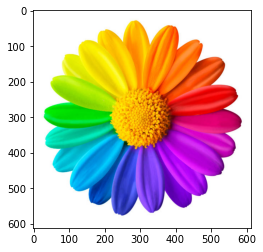

In [13]:
# Leer y mostrar una imagen
image = skimage.io.imread(fname="img/color_flower.jpeg")
print(image.shape)
plt.imshow(image)

In [14]:
print(image.shape)
print(image)

(612, 612, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


### Sistema de coordenadas en imágenes

El sistema de coordenadas modificado utilizado para nuestras imágenes solo tendrá coordenadas positivas, el origen estará en la esquina superior izquierda en lugar del centro, y los valores de las coordenadas y se harán más grandes:



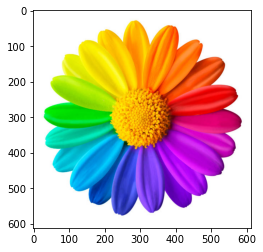

In [51]:
plt.imshow(image)

### Cambiando los valores de pixeles


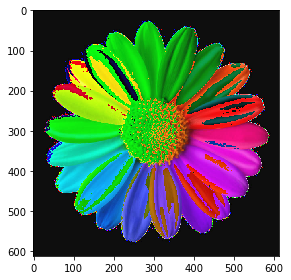

In [58]:
copy_img = image

# sumar a toda la matriz un valor
copy_img = copy_img + 15

# salvar la imagen a un fichero tipo imagen
skimage.io.imsave(fname="img/copy_flower.jpg", arr=copy_img)
skimage.io.imshow(copy_img)

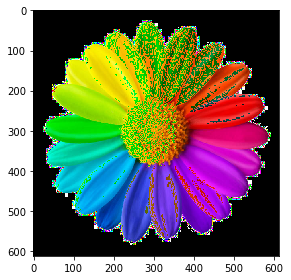

In [62]:
copy_img = image

# filtrado por color absoluto
copy_img[image == 255] = 0

skimage.io.imshow(copy_img)

(612, 612)


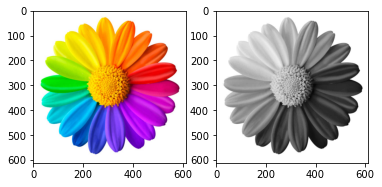

In [17]:
# convertir a escala de grises

import skimage.color

image = skimage.io.imread(fname="img/color_flower.jpeg")

gray_img = skimage.color.rgb2gray(image)
print(gray_img.shape)

# mostrar imagenes al mismo tiempo
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(image)
ax2.imshow(gray_img, cmap="gray")

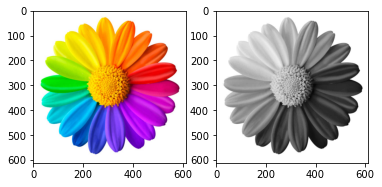

In [66]:
image = skimage.io.imread(fname="img/color_flower.jpeg")

# leer imagen en escala de grises
gray_img = skimage.io.imread(fname="img/color_flower.jpeg", as_gray=True)

# mostrar imagenes al mismo tiempo
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(image)
ax2.imshow(gray_img, cmap="gray")

### Redimensionando una imagen


(61, 61, 3)


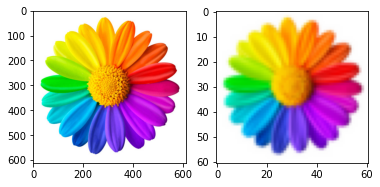

In [22]:
# redimensionando la imagen
new_shape = (image.shape[0] // 10, image.shape[1] // 10, image.shape[2])
print(new_shape)
small_img = skimage.transform.resize(image=image, output_shape=new_shape)
small_img = skimage.img_as_ubyte(small_img)


# mostrar imagenes al mismo tiempo
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(image)
ax2.imshow(small_img)

### Recortado de imagen


(593, 800, 3)


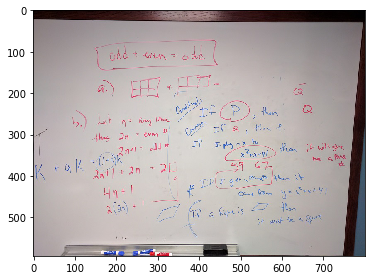

In [26]:
board = skimage.io.imread(fname="img/board.jpeg")
print(board.shape)
skimage.io.imshow(board)

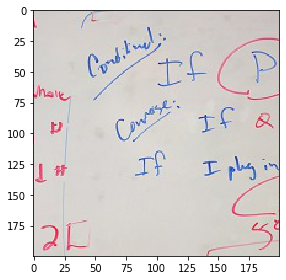

In [27]:
# recortar una sub-imagen
clip = board[296-100:296+100, 300:500, :]
skimage.io.imshow(clip)
skimage.io.imsave(fname="img/clip.png", arr=clip)

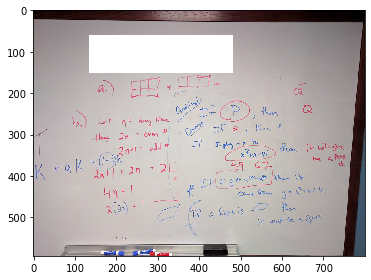

In [30]:
# remplazar el area con un color
color = board[330, 90]
board[60:151, 135:481] = 255
skimage.io.imshow(board)

/Users/ruberhg/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


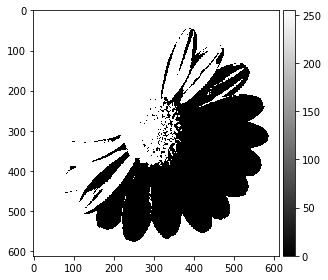

In [31]:
def threshold_slow(T, image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
            
    # return the thresholded image
    return image

img = skimage.io.imread(fname="img/color_flower.jpeg", as_gray=True)
new_img = threshold_slow(0.5, img)
skimage.io.imshow(new_img, cmap="gray")

### Filtrado de imagen

![blur_demo](img/blur_demo.gif)

(702, 705)
(706, 709)


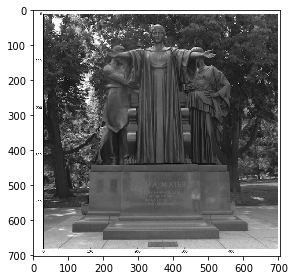

In [34]:
# define a filter size
filterSize = 2

# read image
img = skimage.io.imread(fname="img/girl.png", as_gray=True)
h, w = img.shape
print(img.shape)

# pad image
paddingThickness = filterSize//2
paddedImg = np.pad(img, paddingThickness,constant_values=(0))
print(paddedImg.shape)
skimage.io.imshow(img, cmap="gray")

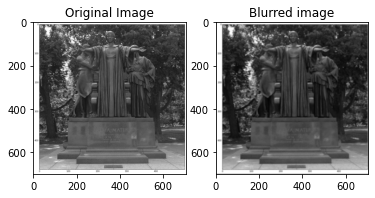

In [35]:
f_img = []

for y in range(h):
    f_row = []
    for x in range(w):
        f_row.append((paddedImg[y:y+filterSize,x:x+filterSize]).sum()/4)
    f_img.append(f_row)

filtered_img = np.array(f_img)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("Original Image")
ax1.imshow(img,cmap="gray")
ax2.set_title("Blurred image")
ax2.imshow(filtered_img,cmap="gray")

----

## Tarea 1

Implemente un programa que dada una imagen realize una aumentación de muestras a partir de la misma siguiendo el procedimiento descrito a continuación. 

El proceso propuesto consiste en fijar una región central en la imagen (respetando la misma resolución de aspecto) y aumentar el conjunto de muestras realizando traslaciones de 5 pixeles en los ejes de las abscisas y ordenadas (hasta ambos bordes), además de realizar rotaciones de 5 grados con respecto al centro en ambas direcciones.

![augmentation](img/palm_roi.png)

### Consideraciones
* No usar librerias de procesamiento de imágenes.
* La imagen deberá ser leída en escala de grises.
* Las muestras obtenidas serán almacenadas en un directorio llamado `aumentation`, considerando el nombre original y una numeración que indique la transformación realizada, p.e. `imagen_original-dx5-dy0-dr15.png`.
* La ubicación de la imagen será dada por parámetros (CLI).
* Además del programa `.py`, se deberá entregar un Jupyter Notebook donde se comente el código y se muestren ejemplos de las imágenes resultantes.

----

## Tarea 2

Implemente un programa que dada una imagen realize las diferentes operaciones de _pooling_ sobre la misma, considerando un tamaño dado y un valor de stride, como se muestra en la siguiente figura.

![augmentation](img/pooling.png)

### Consideraciones
* No usar librerias de procesamiento de imágenes.
* La imagen deberá ser leída en escala de grises.
* Las muestras obtenidas serán almacenadas en un directorio llamado `pooling`.
* La ubicación de la imagen, el tamaño de _pooling_=(2,2) y _stride_=1 serán dada por parámetros (CLI).
* Además del programa `.py`, se deberá entregar un Jupyter Notebook donde se comente el código y se muestren ejemplos de las imágenes resultantes.

----

## Tarea 3

Implemente un programa que dada una imagen aplique diferentes filtros convolucionales sobre la misma, considerando un set cinco _kernels_ aleatorios y un valor de stride, como se muestra en la siguiente figura.

![augmentation](img/conv.png)

### Consideraciones
* No usar librerias de procesamiento de imágenes.
* La imagen deberá ser leída en escala de grises.
* Las muestras obtenidas serán almacenadas en un directorio llamado `activations`.
* La ubicación de la imagen, el tamaño de los _kernel_=(3x3) y _stride_=1 serán dados por parámetros (CLI).
* Además del programa `.py`, se deberá entregar un Jupyter Notebook donde se comente el código y se muestren ejemplos de las imágenes resultantes.